# Árboles de Regresión

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [ ]:
# vamos a trabajar con el dataset de los precios de las casas de boston. en este dataset tanto las variables predictoras como las objetivo son continuas


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [ ]:
#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
# definimos las primeras 13 variables como predictoras y la ultima como target

In [5]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [8]:
predictors

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [6]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [9]:
target

'medv'

In [7]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)

In [12]:
regtree.fit(X,Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [14]:
preds = regtree.predict(data[predictors])

In [15]:
data["preds"] = preds

In [ ]:
# vamos a comparar la prediccion con el original

In [16]:
data[["preds", "medv"]]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,23.787500,22.4
502,23.787500,20.6
503,28.978261,23.9
504,31.170000,22.0


In [17]:
# entonces vamos a comprobar si hay o no muchas resultados cuya predicción sea igual o muy parecido a la realidad

# vamos lo primero a representar el arbol

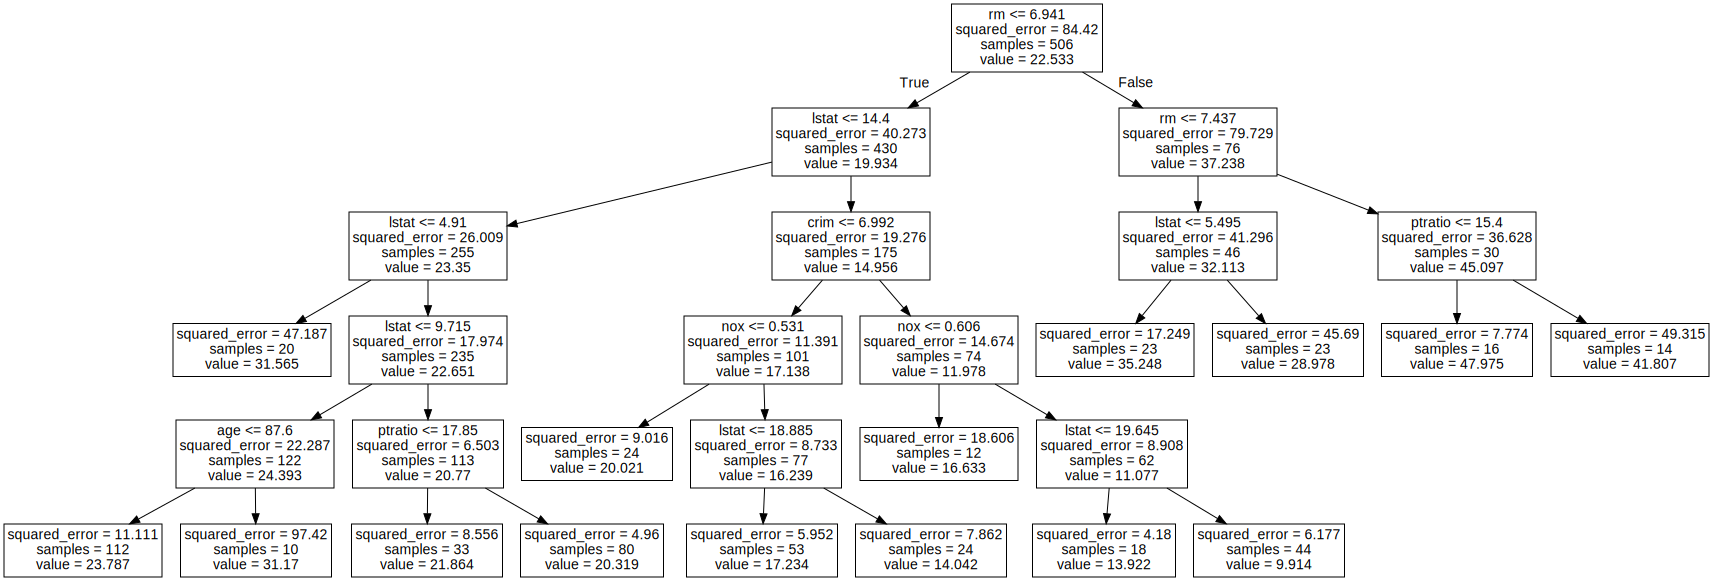

In [19]:
from sklearn.tree import export_graphviz
with open("/content/drive/MyDrive/Python Machine Learning JGG/notebooks/resources/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
import os
from graphviz import Source
file = open("/content/drive/MyDrive/Python Machine Learning JGG/notebooks/resources/boston_rtree.dot", "r")
text = file.read()
Source(text)

In [ ]:
# para ver si el modelo es válido, hacemos cross validation

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

In [21]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)
cv.get_n_splits(X)
scores = cross_val_score(regtree, X, Y, scoring=make_scorer(mean_squared_error), cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[14.21501779 16.62018743 18.48312343 46.22608214 10.25202434 18.39546877
 15.08005674 32.23929702 23.04375075 10.93761052]
20.54926189262014


In [ ]:
# este error de 20, nos da 20ptos arriba y 20ptos abajo en la predicción

In [22]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.6341876193016562),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.009620458196377114),
 ('black', 0.0),
 ('lstat', 0.2936467891265104)]

In [ ]:
# las variables que mas aportan son:
# rm
# lstat
# y luego ya van:
# crim
# nox
# age

In [28]:
for i in range(1,11):
    regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)
    regtree.fit(X,Y)
    cv = KFold(n_splits = 10, shuffle=True, random_state=1)
    cv.get_n_splits(X)
    scores = cross_val_score(regtree, X, Y, scoring=make_scorer(mean_squared_error), cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",regtree.feature_importances_)
    print("")

Score para i =  1  es de  20.54926189262014
    [0.03218453 0.         0.         0.         0.01619533 0.63418762
 0.01416527 0.         0.         0.         0.00962046 0.
 0.29364679]

Score para i =  2  es de  20.54926189262014
    [0.03218453 0.         0.         0.         0.01619533 0.63418762
 0.01416527 0.         0.         0.         0.00962046 0.
 0.29364679]

Score para i =  3  es de  20.54926189262014
    [0.03218453 0.         0.         0.         0.01619533 0.63418762
 0.01416527 0.         0.         0.         0.00962046 0.
 0.29364679]

Score para i =  4  es de  20.54926189262014
    [0.03218453 0.         0.         0.         0.01619533 0.63418762
 0.01416527 0.         0.         0.         0.00962046 0.
 0.29364679]

Score para i =  5  es de  20.54926189262014
    [0.03218453 0.         0.         0.         0.01619533 0.63418762
 0.01416527 0.         0.         0.         0.00962046 0.
 0.29364679]

Score para i =  6  es de  20.54926189262014
    [0.03218453 

## Random Forests

In [ ]:
# vamos a aplicar random forest y vamos a ver si tenemos menos tasa de error que antes:

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
forest = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=10000)      #OJO: le estamos diciendo n_jobs = -1, si ponemos 2 o más, podemos colgar el ordenador
forest.fit(X,Y)

RandomForestRegressor(n_estimators=10000, n_jobs=-1, oob_score=True)

In [31]:
data["rforest_pred"]= forest.oob_prediction_    #estan son las predicciones del modelo
data[["rforest_pred", "medv"]]      #aquí las comparamos con las originales

,rforest_pred,medv
0,28.419374,24.0
1,22.604669,21.6
2,34.416572,34.7
3,34.628799,33.4
4,34.303037,36.2
...,...,...
501,24.210668,22.4
502,18.901500,20.6
503,27.511892,23.9
504,26.135947,22.0


In [ ]:
# y aquí comparo las tres

In [32]:
data[["preds","rforest_pred", "medv"]]


,preds,rforest_pred,medv
0,23.787500,28.419374,24.0
1,23.787500,22.604669,21.6
2,35.247826,34.416572,34.7
3,35.247826,34.628799,33.4
4,35.247826,34.303037,36.2
...,...,...,...
501,23.787500,24.210668,22.4
502,23.787500,18.901500,20.6
503,28.978261,27.511892,23.9
504,31.170000,26.135947,22.0


In [ ]:
# calculo el error cuadratico medio

In [33]:
data["rforest_error2"] = (data["rforest_pred"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)

10.21147553461774

In [ ]:
# hemos bajado de 20 a 10

In [ ]:
# y tambien podemos ver el score:
# 

In [34]:
forest.oob_score_

0.8790389810184763